In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

len(train_data)

len(test_data)

train_data[10]

2113536/2110848 [==============================] - 0s 0us/step


/Users/astrid/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/astrid/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [2]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

train_labels[10]

557056/550378 [==============================] - 0s 0us/step


3

In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [7]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [10]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [11]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 28ms/step - loss: 2.7055 - accuracy: 0.5288 - val_loss: 1.7655 - val_accuracy: 0.6340
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.4368 - accuracy: 0.7106 - val_loss: 1.3250 - val_accuracy: 0.7280
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.0424 - accuracy: 0.7851 - val_loss: 1.1347 - val_accuracy: 0.7610
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.8189 - accuracy: 0.8274 - val_loss: 1.0356 - val_accuracy: 0.7840
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6506 - accuracy: 0.8657 - val_loss: 0.9650 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5214 - accuracy: 0.8933 - val_loss: 0.9368 - val_accuracy: 0.8180
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.4212 - accuracy: 0.9143 - val_loss: 0.9028 - val_accuracy: 0.8230
Epoch 8/20
16

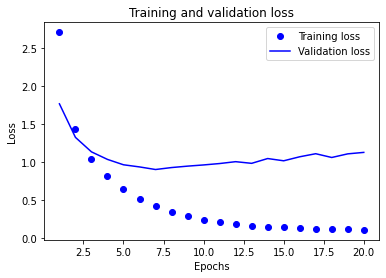

In [16]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

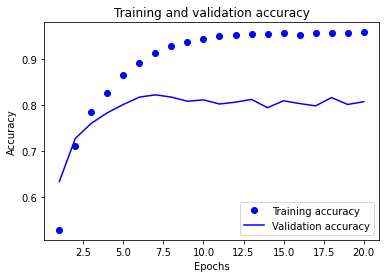

In [17]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [18]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 16ms/step - loss: 2.4923 - accuracy: 0.5479
Epoch 2/9
18/18 [==============================] - 0s 14ms/step - loss: 1.3175 - accuracy: 0.7233
Epoch 3/9
18/18 [==============================] - 0s 14ms/step - loss: 0.9791 - accuracy: 0.7951
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 0.7636 - accuracy: 0.8367
Epoch 5/9
18/18 [==============================] - 0s 14ms/step - loss: 0.6038 - accuracy: 0.8739
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4790 - accuracy: 0.8990
Epoch 7/9
18/18 [==============================] - 0s 13ms/step - loss: 0.3875 - accuracy: 0.9173
Epoch 8/9
18/18 [==============================] - 0s 13ms/step - loss: 0.3158 - accuracy: 0.9305
Epoch 9/9
71/71 [==============================] - 0s 1ms/step - loss: 0.9534 - accuracy: 0.7970


In [19]:
results

[0.9533682465553284, 0.796972393989563]

In [20]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19100623330365094

In [21]:
predictions = model.predict(x_test)

predictions[0].shape

np.sum(predictions[0])

np.argmax(predictions[0])

3

In [22]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)


In [23]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [24]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 3.0968 - accuracy: 0.2392 - val_loss: 2.5322 - val_accuracy: 0.2590
Epoch 2/20
63/63 [==============================] - 1s 8ms/step - loss: 2.0364 - accuracy: 0.4272 - val_loss: 1.6699 - val_accuracy: 0.6330
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 1.4064 - accuracy: 0.6640 - val_loss: 1.4348 - val_accuracy: 0.6630
Epoch 4/20
63/63 [==============================] - 1s 8ms/step - loss: 1.2209 - accuracy: 0.6928 - val_loss: 1.3647 - val_accuracy: 0.6760
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 1.0981 - accuracy: 0.7156 - val_loss: 1.3353 - val_accuracy: 0.6760
Epoch 6/20
63/63 [==============================] - 1s 8ms/step - loss: 0.9973 - accuracy: 0.7298 - val_loss: 1.3615 - val_accuracy: 0.6820
Epoch 7/20
63/63 [==============================] - 1s 8ms/step - loss: 0.9055 - accuracy: 0.7439 - val_loss: 1.3239 - val_accuracy: 0.6870
Epoch 8/20
63/63 [=